In [534]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as split
import joblib
import pickle
import numpy as np

In [156]:
import warnings
warnings.filterwarnings("ignore")

In [382]:
df = pd.read_csv("simulated_harvest_dataset_with_lgas.csv")
#df.head(10)
lgas = pd.read_csv("lgas.csv")
lgas = lgas.drop(columns = "state_name")

In [384]:
lgas = lgas.rename(columns={"name": "lga", "lat": "latitude", "lon": "longitude"})
df = df.rename(columns={"local_government": "lga"})

In [386]:
df["lga"] = df["lga"].str.strip().str.lower()
lgas["lga"] = lgas["lga"].str.strip().str.lower()

In [388]:
df = df.merge(lgas[['lga', 'latitude', 'longitude']], on="lga", how="left")
df

,farmer_id,expected_harvest_date,crop_type,state,lga,latitude,longitude
0,FARMER0001,2024-09-06,Pepper,Lagos,ikorodu,6.600000,3.500000
1,FARMER0002,2024-03-25,Rice,Enugu,enugu east,6.533330,7.533330
2,FARMER0003,2024-05-14,Cassava,Bauchi,dass,10.126111,9.484704
3,FARMER0004,2023-12-19,Rice,Oyo,ogbomosho,NaN,NaN
4,FARMER0005,2023-09-02,Sorghum,Oyo,oyo east,7.882092,3.998755
...,...,...,...,...,...,...,...
688,FARMER0689,2024-05-27,Sorghum,Benue,makurdi,7.730556,8.536111
689,FARMER0690,2025-03-04,Rice,Bauchi,ningi,11.066667,9.566667
690,FARMER0691,2025-02-26,Cassava,Bauchi,dass,10.126111,9.484704
691,FARMER0692,2025-03-25,Yam,Enugu,nkanu west,6.300000,7.550000


In [390]:
df[df["latitude"].isna() == True]

,farmer_id,expected_harvest_date,crop_type,state,lga,latitude,longitude
3,FARMER0004,2023-12-19,Rice,Oyo,ogbomosho,NaN,NaN
9,FARMER0010,2024-09-08,Groundnut,Enugu,oji river,NaN,NaN
27,FARMER0028,2023-05-10,Sorghum,Oyo,ibarapa,NaN,NaN
29,FARMER0030,2024-11-15,Sorghum,Oyo,ibarapa,NaN,NaN
30,FARMER0031,2023-10-10,Groundnut,Rivers,obio-akpor,NaN,NaN
...,...,...,...,...,...,...,...
600,FARMER0601,2023-10-10,Rice,Oyo,ogbomosho,NaN,NaN
609,FARMER0610,2024-01-28,Yam,Kano,nassarawa,NaN,NaN
659,FARMER0660,2024-04-07,Groundnut,Oyo,ogbomosho,NaN,NaN
676,FARMER0677,2024-04-22,Rice,Oyo,ibarapa,NaN,NaN


In [392]:
df = df.dropna()

In [394]:
df["expected_harvest_year"] = df["expected_harvest_date"].str[0:4]
df["expected_harvest_month"] = df["expected_harvest_date"].str[5:7]
df["expected_harvest_day"] = df["expected_harvest_date"].str[8:10]
df["expected_harvest_year"] = df["expected_harvest_year"].apply(lambda x: int(x))
df["expected_harvest_month"] = df["expected_harvest_month"].apply(lambda x: int(x))
df["expected_harvest_day"] = df["expected_harvest_day"].apply(lambda x: int(x))

In [396]:
df = df.drop(columns = ["expected_harvest_date", "farmer_id", "expected_harvest_year", "state", "lga"])
df

,crop_type,latitude,longitude,expected_harvest_month,expected_harvest_day
0,Pepper,6.600000,3.500000,9,6
1,Rice,6.533330,7.533330,3,25
2,Cassava,10.126111,9.484704,5,14
4,Sorghum,7.882092,3.998755,9,2
5,Cassava,11.313599,10.463126,7,12
...,...,...,...,...,...
688,Sorghum,7.730556,8.536111,5,27
689,Rice,11.066667,9.566667,3,4
690,Cassava,10.126111,9.484704,2,26
691,Yam,6.300000,7.550000,3,25


In [398]:
df = df.drop_duplicates()

In [400]:
df_1 = pd.get_dummies(df)
X = df_1.replace(False, 0).replace(True, 1)
X

,latitude,longitude,expected_harvest_month,expected_harvest_day,crop_type_Cassava,crop_type_Groundnut,crop_type_Maize,crop_type_Pepper,crop_type_Rice,crop_type_Sorghum,crop_type_Yam
0,6.600000,3.500000,9,6,0,0,0,1,0,0,0
1,6.533330,7.533330,3,25,0,0,0,0,1,0,0
2,10.126111,9.484704,5,14,1,0,0,0,0,0,0
4,7.882092,3.998755,9,2,0,0,0,0,0,1,0
5,11.313599,10.463126,7,12,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
688,7.730556,8.536111,5,27,0,0,0,0,0,1,0
689,11.066667,9.566667,3,4,0,0,0,0,1,0,0
690,10.126111,9.484704,2,26,1,0,0,0,0,0,0
691,6.300000,7.550000,3,25,0,0,0,0,0,0,1


In [709]:
saved_columns = X.columns.tolist()

In [664]:
scaler_loc = StandardScaler()
scaler_time = StandardScaler()
scaler_crop = StandardScaler()

location_features = ['longitude', 'latitude']
time_features = ['expected_harvest_month', 'expected_harvest_day']
crop_features = [col for col in X.columns if col.startswith('crop_')]

scaled_loc = scaler_loc.fit_transform(X[location_features]) * 2
scaled_time = scaler_time.fit_transform(X[time_features])
scaled_time[:, 0] *= 5
scaled_time[:, 1] *= 3.5
scaled_crop = scaler_crop.fit_transform(X[crop_features]) * 0.5

X_scaled = np.hstack((scaled_loc, scaled_time, scaled_crop))

In [666]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-3.981809,-1.762832,3.712057,-4.066518,-0.239485,-0.202031,-0.222965,1.307431,-0.187083,-0.184302,-0.199352
1,-0.290043,-1.828365,-5.010465,3.586630,-0.239485,-0.202031,-0.222965,-0.191215,1.336306,-0.184302,-0.199352
2,1.496078,1.703147,-2.102958,-0.844140,1.043908,-0.202031,-0.222965,-0.191215,-0.187083,-0.184302,-0.199352
3,-3.525291,-0.502604,3.712057,-5.677707,-0.239485,-0.202031,-0.222965,-0.191215,-0.187083,1.356466,-0.199352
4,2.391641,2.870384,0.804549,-1.649734,1.043908,-0.202031,-0.222965,-0.191215,-0.187083,-0.184302,-0.199352
...,...,...,...,...,...,...,...,...,...,...,...
622,0.627817,-0.651556,-2.102958,4.392225,-0.239485,-0.202031,-0.222965,-0.191215,-0.187083,1.356466,-0.199352
623,1.571099,2.627663,-5.010465,-4.872112,-0.239485,-0.202031,-0.222965,-0.191215,1.336306,-0.184302,-0.199352
624,1.496078,1.703147,-6.464219,3.989427,1.043908,-0.202031,-0.222965,-0.191215,-0.187083,-0.184302,-0.199352
625,-0.274785,-2.057716,-5.010465,3.586630,-0.239485,-0.202031,-0.222965,-0.191215,-0.187083,-0.184302,1.254063


In [638]:
x_train, x_test = split(X_scaled, random_state = False)

In [636]:
#num = round(X_scaled.shape[0]/5)

In [686]:
cluster = DBSCAN(eps = 2, min_samples= 2)
#cluster_2 = KMeans(n_clusters= num)
cluster.fit_predict(X_scaled)

array([  0,   1,   2,  -1,  -1,   3,  -1,  -1,  -1,  -1,  -1,  -1,  -1,
        -1,   4,  -1,   3,   5,   6,   7,  -1,   8,  -1,   9,  -1,  10,
        11,  -1,  -1,  -1,  -1,  12,  -1,  13,  14,  -1,  15,  -1,  14,
        16,  11,  17,  18,  -1,  19,  -1,  -1,  -1,  -1,  -1,  20,  21,
        22,  23,  -1,  24,  25,  26,  27,  28,  -1,  29,  13,  30,  31,
        32,  33,   3,  -1,  -1,  -1,   9,  -1,  28,  34,  35,  -1,  -1,
        36,  37,  -1,  38,  39,  39,  13,  40,  41,  -1,  42,  39,  -1,
        -1,  43,  -1,  44,  45,  21,  46,  47,  -1,  -1,   8,  -1,  18,
        48,  -1,  -1,  49,  50,  -1,  -1,  -1,  37,  51,  -1,  -1,  52,
        -1,  53,  -1,  11,  54,  55,  -1,  56,  -1,  24,  -1,  -1,  57,
         3,  58,  59,  12,  30,  50,  -1,  60,  -1,  -1,  -1,  -1,  -1,
        61,  -1,  53,  -1,  -1,  38,  62,  -1,  -1,   4,  -1,  63,  -1,
        64,  65,  -1,  66,  -1,  67,  68,  -1,  -1,  69,  39,  70,  71,
        -1,  72,  -1,  -1,  -1,  56,  -1,  53,  73,  -1,  -1,  -

In [688]:
df["clusters"] = cluster.fit_predict(X_scaled)
df.clusters.value_counts()

clusters
-1      291
 14      13
 29       8
 77       8
 45       7
       ... 
 73       2
 26       2
 75       2
 25       2
 110      2
Name: count, Length: 112, dtype: int64

In [700]:
df[df["clusters"] == 77]

,crop_type,latitude,longitude,expected_harvest_month,expected_harvest_day,clusters
218,Cassava,10.126111,9.484704,11,30,77
235,Cassava,9.923174,7.430551,10,25,77
244,Maize,9.578827,8.292147,10,28,77
249,Groundnut,9.923174,7.430551,10,24,77
338,Groundnut,10.285059,7.110283,9,22,77
490,Cassava,9.916667,8.900000,10,28,77
512,Maize,9.578827,8.292147,9,30,77
640,Cassava,9.250000,8.883333,9,28,77


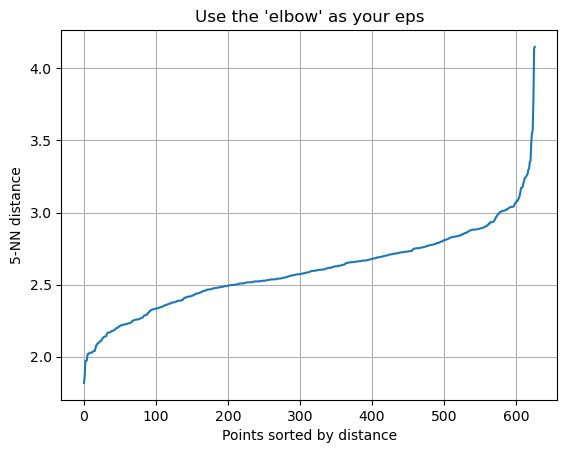

In [668]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)  # your feature matrix
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])  # 4 = n_neighbors - 1
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5-NN distance")
plt.title("Use the 'elbow' as your eps")
plt.grid()
plt.show()

In [378]:
X.to_csv("check_clusters.csv")

In [702]:
joblib.dump(scaler_loc, 'scaler_loc.pkl')
joblib.dump(scaler_time, 'scaler_time.pkl')
joblib.dump(scaler_crop, 'scaler_crop.pkl')

['scaler_crop.pkl']

In [711]:
with open("cluster_columns.pkl", "wb") as f:
    pickle.dump(saved_columns, f)

In [705]:
with open("clustering_model.pkl", "wb") as f:
    pickle.dump(cluster, f)